In [9]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import export_graphviz
import graphviz
import warnings

In [13]:
warnings.filterwarnings("ignore")

In [2]:
# Load red wine data.
data = pd.read_csv('../data/Dataset.csv',index_col=0)
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
# Split data into training and test sets
y = data.quality
X = data.drop('quality', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=y)

In [4]:
# Evaluate model pipeline on test data
model = RandomForestRegressor(n_estimators = 1000, oob_score = True, n_jobs = -1,random_state =50,max_features = "auto", min_samples_leaf = 2)
finalTree = model.fit(X_train, y_train)
print (finalTree)
pred = model.predict(X_test)
print (mean_squared_error(y_test, pred))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=True, random_state=50, verbose=0, warm_start=False)
0.34635446870873365


In [14]:
for tree_in_forest in finalTree.estimators_:
    export_graphviz(tree_in_forest,feature_names=X.columns,filled=True,rounded=True)

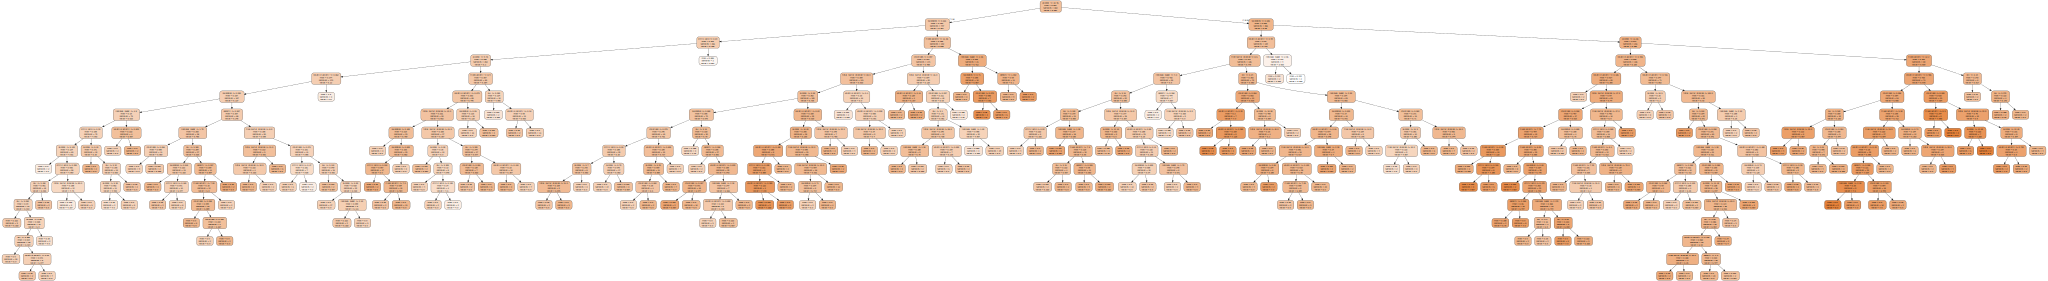

In [8]:
os.system('dot -Tpng tree.dot -o tree.png')
with open("tree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)
